### Unsupervised Learning - section 1

- We are going to discuss about value of unsupervised learning to find hidden structure in the data
- Try hands-on with market basket analysis, dimensionality reduction and clustering
- Interpret the results and improve the model based on the results

#### Unsupervised Learning is used to discover a better representation of your features
- Goal: To learn structure hidden in your features without training labels to simplify your input variables and make them more useful
- Application: Reduce the number of features for visualization and more effective supervised learning and identify subgroups

### Market Basket Analysis (MBA)
- We will see how market basket analysis identifies which combination of products are often purchased together (antecedent and consequent).
- How to find and evaluate association rules
        - For evaluating association rules, there are 3 key metrics: Support, Confidence and Lift
        - Support (Prevalence) : How frequent are itemsets, antecedent or consequent purchased together.
        - Confidence (Predictability): Given the purchase of the antecedent, how likely is the purchase of the consequent
        - Lift (Interest) : How much more likely is the relationship an association rule than we wuld expect by chance
        
- How to act on the resulting association rules
- how can you apply assocoation rules beyond MBA

### Statistical Significance
- fisher's exact p-value of association: allows you to assess the rules you have discovered are likely to generalize to the new data as opposed to the results of randomness of your sample
- Small sample size may result in unreliable rules
- Fisher's contigency table

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import combinations
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='talk', fscale=1.8, spines=False, gridlines='--', ticks=True, grid=False, figsize=(20, 12))

### Preparing the data

In [49]:
df = pd.read_csv('.\\data\\grocery_transactions.csv', header = None)
df.iloc[:12, :12]

,0,1,2,3,4,5,6,7,8,9,10,11
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
len(df)

9835

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
0     9835 non-null object
1     7676 non-null object
2     6033 non-null object
3     4734 non-null object
4     3729 non-null object
5     2874 non-null object
6     2229 non-null object
7     1684 non-null object
8     1246 non-null object
9     896 non-null object
10    650 non-null object
11    468 non-null object
12    351 non-null object
13    273 non-null object
14    196 non-null object
15    141 non-null object
16    95 non-null object
17    66 non-null object
18    52 non-null object
19    38 non-null object
20    29 non-null object
21    18 non-null object
22    14 non-null object
23    8 non-null object
24    7 non-null object
25    7 non-null object
26    6 non-null object
27    5 non-null object
28    4 non-null object
29    1 non-null object
30    1 non-null object
31    1 non-null object
dtypes: object(32)
memory usage: 2.4+ MB


### Plot basket size

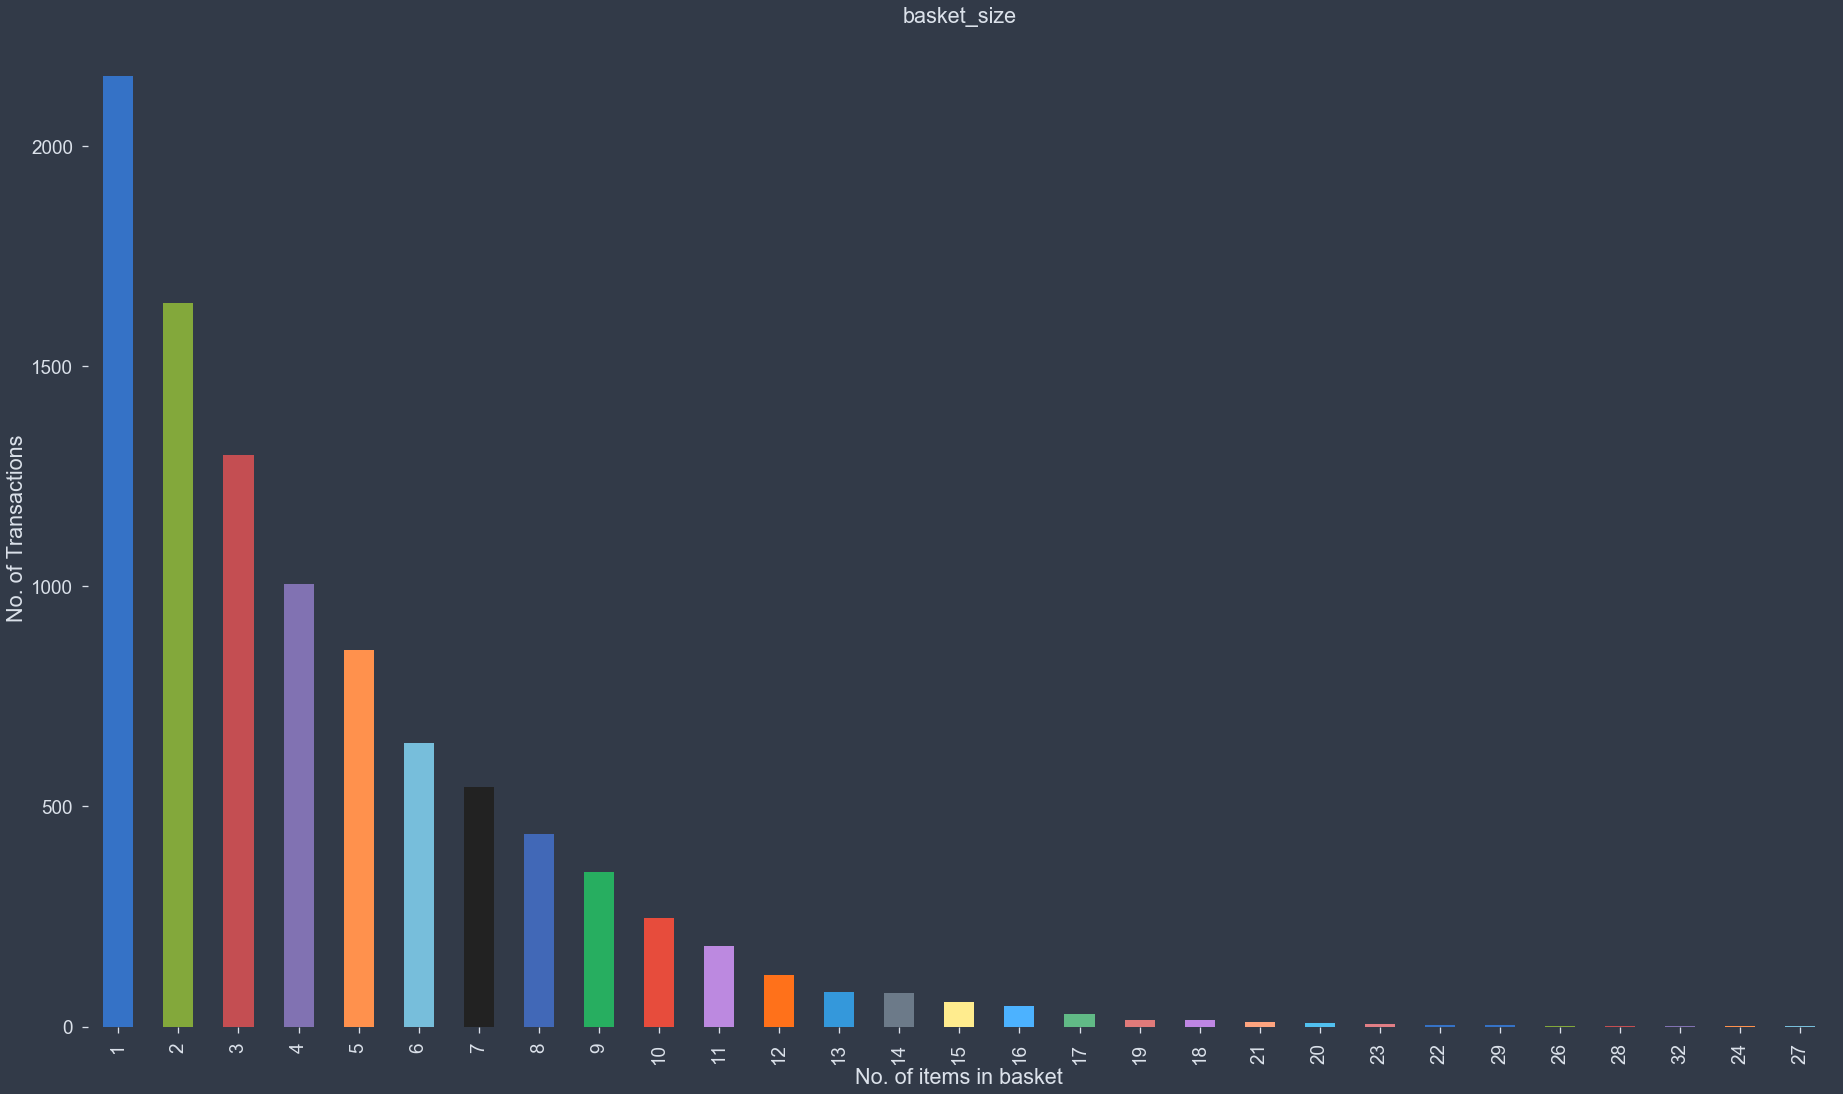

In [52]:
df.count(axis = 1).value_counts().plot.bar(title = 'basket_size')
plt.xlabel('No. of items in basket')
plt.ylabel('No. of Transactions')
plt.tight_layout();

### Reshape the data to create transaction product matrix

In [53]:
df_stacked = df.stack()
df_stacked.index.names = ['trx_id', 'basket_id']
df_stacked.head(10)

trx_id  basket_id
0       0                   citrus fruit
        1            semi-finished bread
        2                      margarine
        3                    ready soups
1       0                 tropical fruit
        1                         yogurt
        2                         coffee
2       0                     whole milk
3       0                      pip fruit
        1                         yogurt
dtype: object

In [54]:
df_stacked.reset_index('basket_id', drop= True, inplace = True)

### Checking item frequencies

In [55]:
df_stacked.value_counts().head()

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
dtype: int64

In [56]:
df_stacked.value_counts().tail()

bags                     4
kitchen utensil          4
preservation products    2
sound storage medium     1
baby food                1
dtype: int64

In [57]:
df_stacked.nunique()

169

In [58]:
# Transaction-product matrix
# pd.get_dummies() will convert the categorical variables into dummy/indicator variables 
items = pd.get_dummies(df_stacked)
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43367 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: uint8(169)
memory usage: 7.3 MB


In [59]:
items.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
trx_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sum indicator variables by transaction

In [60]:
items = items.groupby(level = 'trx_id').sum()
items.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
trx_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualization for exploring items

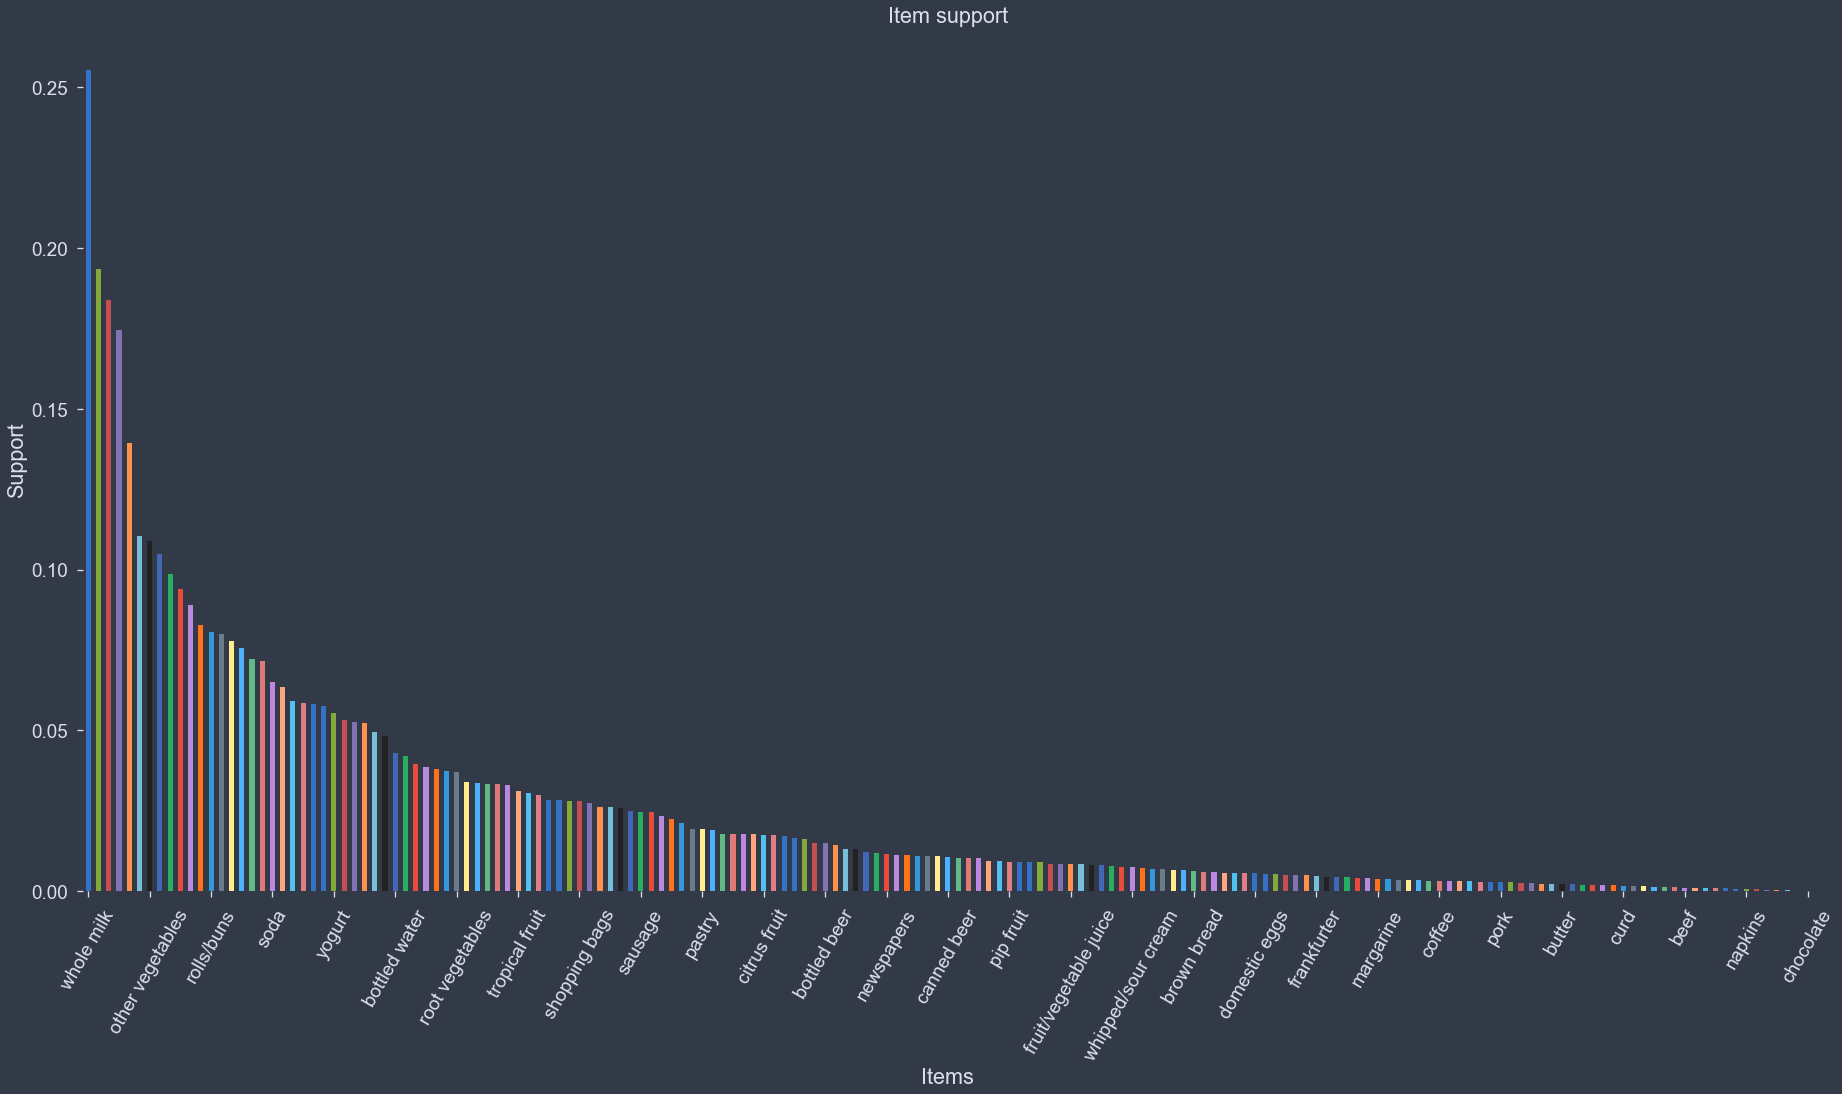

In [61]:
support = items.sum().div(len(items)).sort_values(ascending = False)
ax = support.plot.bar(title = 'Item support')
ax.locator_params(nbins = 30, axis = 'x')
plt.xticks(rotation = 60)
plt.xlabel('Items')
plt.ylabel('Support')
plt.tight_layout();

### Unsupervised Learning - section 2

In [14]:
### Writing it into a function
def retrieve_transaction_data():
    # Load grocery transaction into  dataframe
    df = pd.read_csv('.\\data\\grocery_transactions.csv', header = None)
    df = df.stack().reset_index(-1, drop = True)
    df.index.names = ['trx_id']
    df = pd.get_dummies(df, prefix = '', prefix_sep = '')
    return df.groupby(level = 'trx_id').sum()

In [15]:
data = retrieve_transaction_data()

### Create itemset candidate

In [19]:
data = retrieve_transaction_data()
item_id = pd.Series(dict(enumerate(data.columns)))

print(item_id.head())
transactions = data.values
print(transactions.shape)

min_support = 0.01
item_length = 1
candidates = list(zip(item_id.index))
print("Candidates :", candidates)
candidates_tested = 0
item_sets = pd.DataFrame(columns = ['support', 'length'])

0    Instant food products
1                 UHT-milk
2         abrasive cleaner
3         artif. sweetener
4           baby cosmetics
dtype: object
(9835, 169)


### Candidate generation

In [23]:
for i in range(1, 5):
    remaining_items = np.unique([item for t in candidates for item in t])
    new_candidates = list(combinations(remaining_items, r=i))
    print('Length {}: {:>10,.0f}'.format(i, len(new_candidates)), 
          new_candidates[:5])

Length 1:        169 [(0,), (1,), (2,), (3,), (4,)]
Length 2:     14,196 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
Length 3:    790,244 [(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6)]
Length 4: 32,795,126 [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]
